### Q2 - Binary Classification
- Binary problem with LinearSVC
  - Reduze the Number of dimensions with variance
  - Erros, Confusion Matrix and Roc Curve
- Equal problem but with StandardScaler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pickle
from time import time
# D=pickle.load(open('kMNISTsmall.p','rb'))
#load data
D=pickle.load(open('MNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

In [ ]:
plt.figure(figsize=(10,5))
v=np.var(X1,axis=0)
thres=100
idx=v<thres

plt.plot(v)
plt.plot([0,784],[thres,thres],'r--')

Number of dimensions with variance less da 100: 258
(10000, 526) (5000, 526)


c:\Users\ruben\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time (train/test): 1.689 secs
Total number of erros: 216
Confusion Matrix:
 [[4382  118]
 [  98  402]]
Time (train/test): 3.461 secs
Total number of erros: 208
Confusion Matrix:
 [[4403   97]
 [ 111  389]]


c:\Users\ruben\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'TP-rate')

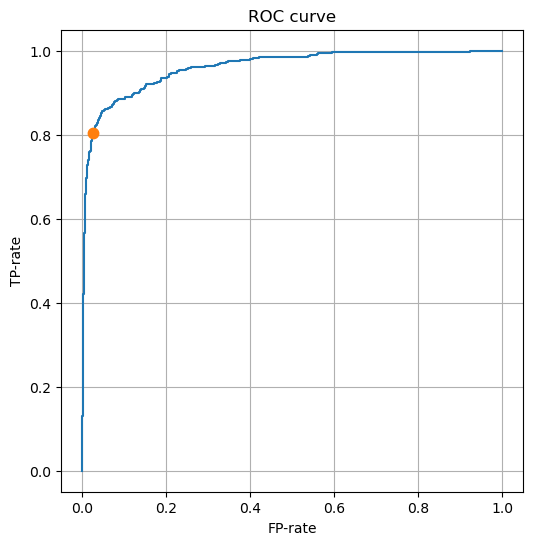

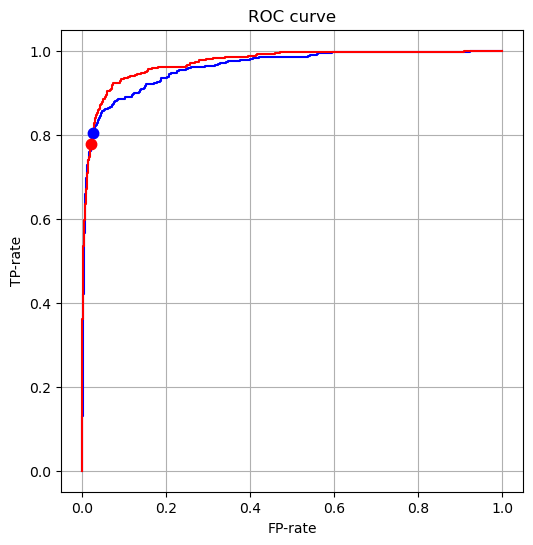

In [2]:
# Q2- binario
#binary labels - Consider the examples of class three (3) 
# as the positive class and the remaning classes as the negative examples.
y1b=(y1==3)*1
y2b=(y2==3)*1

# a) Use the training set to find which dimensions of the data have a 
# variance less than one hundred (100). 
# Print this number and remove these dimensions from the training and test sets.
v=np.var(X1,axis=0)
thres=100
idx=v<thres
print('Number of dimensions with variance less da %d:'%thres,np.sum(idx))
X1b=X1[:,~idx]
X2b=X2[:,~idx]
print(X1b.shape,X2b.shape)

# b) Use the training data to train a LinearSVC classifier with the following parameters: 
# $\texttt{random_state=42}$ and $\texttt{C=0.1}$. 
# Print the total number of errors and the confusion matrix for the test data.
st=time()
svm=LinearSVC(C=0.1,random_state=42)
svm.fit(X1b,y1b)
y2be=svm.predict(X2b)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2b!=y2be))
CM1=confusion_matrix(y2b,y2be)
print('Confusion Matrix:\n',CM1)

# c) Plot the ROC curve of this classifier with the test data. 
# Include in this plot the operating point of the classifier.
#r2c=rfc.predict_proba(X2b)[:,1]
r2c=svm.decision_function(X2b)
fpr1,tpr1,t=roc_curve(y2b,r2c)

#Classificador 1
#fp-rate=FP/(FP+TN)
f1=CM1[0,1]/(CM1[0,0]+CM1[0,1])
#tp-rate=TP/(TP+FN)
r1=CM1[1,1]/(CM1[1,1]+CM1[1,0])

plt.figure(figsize=(6,6))
plt.plot(fpr1,tpr1)
plt.plot(f1,r1,'.',ms=15)
plt.axis('scaled')
plt.grid(True)
plt.title('ROC curve')
plt.xlabel('FP-rate')
plt.ylabel('TP-rate')

# d) Pre-process the data of item 1.a) using the function  $\texttt{StandardScaler}$. 
# Train this function with the training data and apply the transformation to the training and test sets. 
# Use the new training data to train a $\texttt{LinearSVC}$ classifier with the following 
# parameters: $\texttt{random_state=42}$ and $\texttt{C=0.1}$. 
# Print the total number of errors and the confusion matrix for the new test data.
sc=StandardScaler().fit(X1b)
X1c=sc.transform(X1b)
X2c=sc.transform(X2b)

st=time()
svm=LinearSVC(C=0.1,random_state=42)
svm.fit(X1c,y1b)
y2be=svm.predict(X2c)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2b!=y2be))
CM2=confusion_matrix(y2b,y2be)
print('Confusion Matrix:\n',CM2)

# e) In the same figure, plot the ROC curves of the classifiers of item 
# 1.b) and 1.d) with the respective test data. 
# Include in this plot the operational points of both classifiers.
r2c=svm.decision_function(X2c)
fpr2,tpr2,t=roc_curve(y2b,r2c)

#Classificador 2
f2=CM2[0,1]/(CM2[0,0]+CM2[0,1])
#tp-rate=TP/(TP+FN)
r2=CM2[1,1]/(CM2[1,1]+CM2[1,0])

plt.figure(figsize=(6,6))
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr2,tpr2,'r')
plt.plot(f1,r1,'.b',ms=15)
plt.plot(f2,r2,'.r',ms=15)
plt.axis('scaled')
plt.grid(True)
plt.title('ROC curve')
plt.xlabel('FP-rate')
plt.ylabel('TP-rate')

### Q2 - Multi-class Classification
- Multi-class problem with RandomForestClassifier
  - PCA and erros confusion matrix and roc curve
  - Escolha dos melhores parametros com os fors

In [11]:
# a) Pre-process the data using the function  $\texttt{PCA}$. 
# Train this function with the training data and apply the transformation to the 
# training and test sets. Preseve only the first 50 principal componentes of the data. 
# Use the pre-processed data in the following items.
pca=PCA(n_components=50).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)

# b) Train with the training set a $\texttt{RandomForestClassifier}$ with the following parameters: 
# $\texttt{random_state=42}$ and $\texttt{max_depth=10}$. 
# Print the total number of errors and the confusion matrix for the test data.
st=time()
#svm=SVC(kernel='rbf',C=5,random_state=42).fit(X1p,y1)
#y2e=svm.predict(X2p)
rfc=RandomForestClassifier(random_state=42,max_depth=10).fit(X1p,y1)
y2e=rfc.predict(X2p)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2!=y2e))
CM=confusion_matrix(y2,y2e)
print('Confusion Matrix:\n',CM)


# c)  Divide the training set in two: a training and a validation set. 
# Use the function $\texttt{train_test_split}$ with the following parameters: 
# $\texttt{train_size=7000}$, $\texttt{random_state=42}$ and $\texttt{stratify=y1}$
X1pa,X1pb,y1a,y1b=train_test_split(X1p,y1,train_size=7000,stratify=y1,random_state=42)

# d) Use the training set of the previous item to train the $\texttt{RandomForestClassifier}$ (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) and check which value for the parameter $\texttt{n_estimators}$ gives the best score in the validation set. Test the following 
# values for the parameter $\texttt{n_estimators}$: 200, 225, 250, 275 and 300.
nEst=np.arange(200,301,25)
topScore=0
for nE in nEst:
    rfc=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=nE).fit(X1pa,y1a)
    currentScore=rfc.score(X1pb,y1b)
    print(currentScore,nE)
    if currentScore>topScore:
        topScore=currentScore
        bestEst=nE
print('Best Number of Estimators:',bestEst)


Time (train/test): 6.609 secs
Total number of erros: 620
Confusion Matrix:
 [[474   0   2   1   1   2   8   3   4   5]
 [  0 486   1   6   0   2   3   0   2   0]
 [  2   2 427  17   4   0   5   9  31   3]
 [  2   0   3 435   0  24   5   7  18   6]
 [  1   2   5   4 435   3   9   1   3  37]
 [  6   1   0  18   8 433   6  10  10   8]
 [  8   2   5   2  12  19 448   0   4   0]
 [  0  16  23   4   2   6   0 418  12  19]
 [  5   0  14  30   7  11   7   4 404  18]
 [  4   9   1  13  32   3   2   7   9 420]]
0.9016666666666666 200
0.9016666666666666 225
0.9026666666666666 250
0.9016666666666666 275
0.903 300
Best Number of Estimators: 300
Time (train/test): 17.847 secs
Total number of erros: 592
Confusion Matrix:
 [[477   0   2   1   0   3   9   2   4   2]
 [  0 486   1   7   0   1   3   0   2   0]
 [  2   1 430  14   4   0   5   9  32   3]
 [  2   0   3 440   0  22   5   8  16   4]
 [  1   2   5   3 433   5   9   2   4  36]
 [  7   1   1  18   9 437   6   6   7   8]
 [  9   2   2   0  10  20

In [13]:
# e) Re-train with the whole training set (10000 examples) the $\texttt{RandomForestClassifier}$ 
# (with $\texttt{random_state=42}$ and $\texttt{max_depth=10}$) 
# with the best value obtained in the previous item for the parameter $\texttt{n_estimators}$.  
# Print the total number of errors and the confusion matrix for the test data.
from sklearn.metrics import accuracy_score

st=time()
rfc=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=bestEst).fit(X1p,y1)
y2e=rfc.predict(X2p)
et=time()
print('Time (train/test): %.3f secs'%(et-st))
print('Total number of erros:',np.sum(y2!=y2e))
CM=confusion_matrix(y2,y2e)
print('Confusion Matrix:\n',CM)
print("ACC:",accuracy_score(y2,y2e))

Time (train/test): 17.577 secs
Total number of erros: 592
Confusion Matrix:
 [[477   0   2   1   0   3   9   2   4   2]
 [  0 486   1   7   0   1   3   0   2   0]
 [  2   1 430  14   4   0   5   9  32   3]
 [  2   0   3 440   0  22   5   8  16   4]
 [  1   2   5   3 433   5   9   2   4  36]
 [  7   1   1  18   9 437   6   6   7   8]
 [  9   2   2   0  10  20 455   0   2   0]
 [  0  16  21   3   4   3   1 422  14  16]
 [  6   0  15  27   8  13   5   4 402  20]
 [  3   8   1  13  28   5   2   6   8 426]]
ACC: 0.8816


### Q3 - Question 1 - MLP network - Simples
- MLP with Keras
  - data preparation and view of the history and metrics (cm, roc, acc, loss)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle
from time import time

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1
X2=D.X2
y1=D.y1
y2=D.y2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________
None
(10000, 784) (5000, 784) (10000, 10) (5000, 10)
Epoch 1/100
2/2 [==============================] - 2s 313ms/step - loss: 102.3650 - accuracy: 0.0828 - val_loss: 65.0367 - val_accu

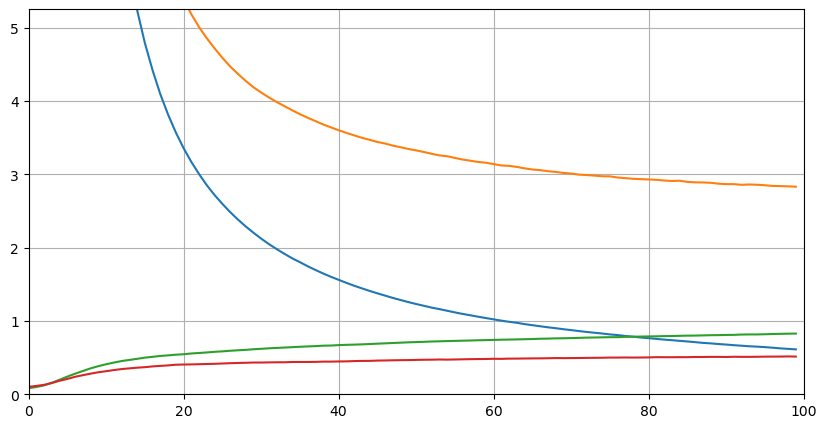

In [2]:
# a) Build this network, and compile it with the loss and the optimizer of your choice. 
# Make sure not to include any extra layers (e.g. Dropout). 
# Print the total number of parameters of the MLP.

#build the MLP

mlp=keras.Sequential()
mlp.add(keras.layers.Dense(50,activation='relu',input_shape=(784,)))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))
print(mlp.summary())

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])


# b) Train the network for 100 epochs with a batch-size of 5000. 
# Use the kMNIST training set. 
# For this purpose use the raw data (make sure not to perform any scaling or transformation of the  data). 
# Also include the test data as the validation set during training.
#prepare data + labels
X1=X1.reshape((10000,784))*1.#/255.
X2=X2.reshape((5000,784))*1.#/255.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

train=mlp.fit(X1,Y1,epochs=100,batch_size=5000,validation_data=(X2,Y2))


# c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets 
# during the training process.  Comment the results.
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'], Label='Training Loss')
plt.plot(h['val_loss'], Label='Validation Loss')
plt.plot(h['accuracy'], Label='Training Accuracy')
plt.plot(h['val_accuracy'], Label='Validation Accuracy')
plt.grid(True)
plt.axis([0,100,0,5.25])
plt.legend()

# Comment: The training loss decreases monotonically, while the validation loss decreases up to a point 
# and then starts to increase.



# d) Print the total number of errors and the confusion matrix for the test dataset.

Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

### Q3 - Question 2 - MLP network - com PCA

(10000, 784) (5000, 784) (10000, 10) (5000, 10)
(10000, 250)
Epoch 1/100
2/2 [==============================] - 2s 238ms/step - loss: 2.3787 - accuracy: 0.1074 - val_loss: 2.3870 - val_accuracy: 0.0992
Epoch 2/100
2/2 [==============================] - 0s 48ms/step - loss: 2.3433 - accuracy: 0.1164 - val_loss: 2.3610 - val_accuracy: 0.1008
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 2.3143 - accuracy: 0.1286 - val_loss: 2.3387 - val_accuracy: 0.1096
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 2.2875 - accuracy: 0.1405 - val_loss: 2.3191 - val_accuracy: 0.1180
Epoch 5/100
2/2 [==============================] - 0s 44ms/step - loss: 2.2622 - accuracy: 0.1551 - val_loss: 2.3016 - val_accuracy: 0.1308
Epoch 6/100
2/2 [==============================] - 0s 45ms/step - loss: 2.2379 - accuracy: 0.1738 - val_loss: 2.2858 - val_accuracy: 0.1406
Epoch 7/100
2/2 [==============================] - 0s 46ms/step - loss: 2.2140 - accuracy: 0.1912 

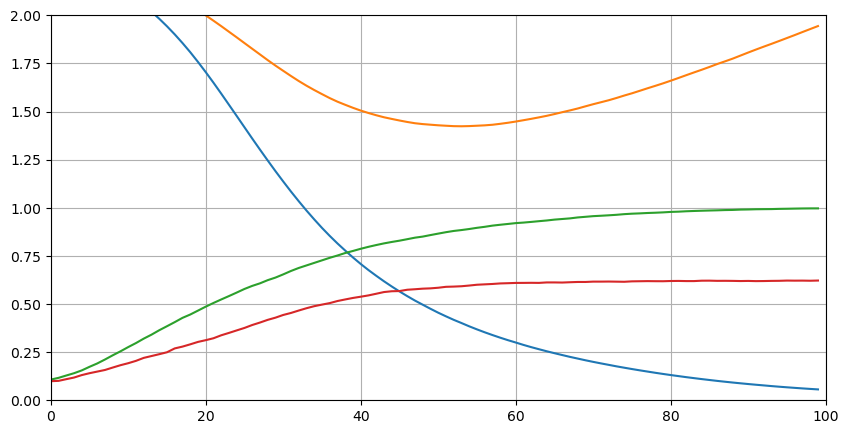

In [3]:
# a) Pre-process the data using the function  $\texttt{PCA(withen=True)}$. 
# Train this function with the training data and apply the transformation to the training and test sets. 
# Preseve only the first 250 principal componentes of the data. 
# Use the pre-processed data in the following items.
from sklearn.decomposition import PCA

D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

X1=X1.reshape((10000,784))*1.
X2=X2.reshape((5000,784))*1.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

nCP=250
pca=PCA(n_components=nCP,whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)

print(X1p.shape)


# b)  Build this network, and compile it with the loss and the optimizer used in the previous question.  
# Train the network for 100 epochs with a batch-size of 5000. 
# Use the kMNIST training set and include the test data as the validation set during training.
#build the MLP
mlp=keras.Sequential()
mlp.add(keras.layers.Flatten(input_shape=(nCP,)))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))
# print(mlp.summary())

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])
train=mlp.fit(X1p,Y1,epochs=100,batch_size=5000,validation_data=(X2p,Y2))



# c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets 
# during the training process.  Comment the results. 
# Also print the total number of errors and the confusion matrix for the test dataset.

h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,100,0,2])

Y2e=mlp.predict(X2p)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))


### Q3 - Question 3 - MLP network - O melhor
- Como melhorar o modelo?
  - Com camadas de droupout para nao havar overfitting
  - Aumento de iteracoes
  - ver mais experiencias como aumentos de camadas e neuronios, 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle
from time import time

D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

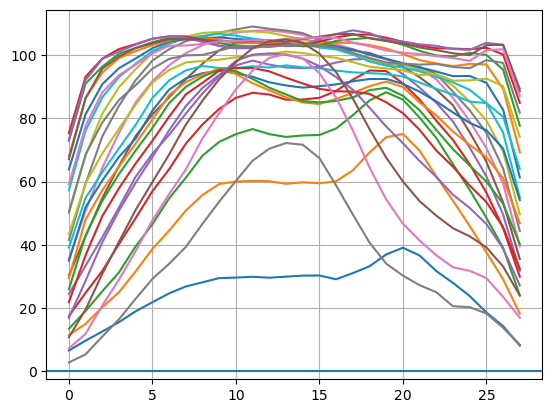

In [7]:
#take out some dims
s=np.std(X1,axis=0)
plt.plot(s)
plt.axhline(0.2)
plt.grid(True)


Epoch 1/120
79/79 [==============================] - 3s 13ms/step - loss: 1.3615 - accuracy: 0.5499 - val_loss: 1.0590 - val_accuracy: 0.6606
Epoch 2/120
79/79 [==============================] - 1s 10ms/step - loss: 0.6880 - accuracy: 0.7820 - val_loss: 0.8591 - val_accuracy: 0.7232
Epoch 3/120
79/79 [==============================] - 1s 10ms/step - loss: 0.5508 - accuracy: 0.8225 - val_loss: 0.7646 - val_accuracy: 0.7584
Epoch 4/120
79/79 [==============================] - 1s 11ms/step - loss: 0.4613 - accuracy: 0.8547 - val_loss: 0.7465 - val_accuracy: 0.7658
Epoch 5/120
79/79 [==============================] - 1s 11ms/step - loss: 0.4072 - accuracy: 0.8710 - val_loss: 0.6741 - val_accuracy: 0.7892
Epoch 6/120
79/79 [==============================] - 1s 11ms/step - loss: 0.3583 - accuracy: 0.8898 - val_loss: 0.6804 - val_accuracy: 0.7916
Epoch 7/120
79/79 [==============================] - 1s 10ms/step - loss: 0.3203 - accuracy: 0.8988 - val_loss: 0.6837 - val_accuracy: 0.7940
Epoch 

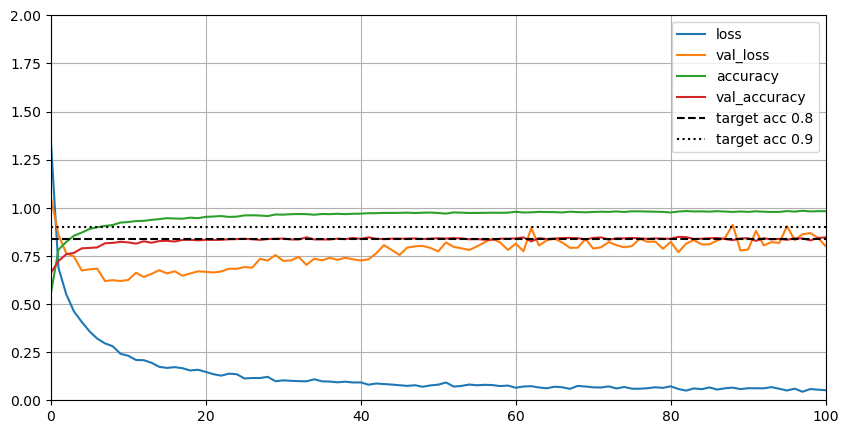

In [78]:
## Consider a MLP network an architecture of your choice, using any type of layers, 
# activation functions or other parameters that might imporve the results. 
# You can also perform any type of pre-processing of the kMNISTsmall data if it helps improve performance. 
# Train and test this new network. Make sure the test results are better than in the previous 2 questions.

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

X1=X1.reshape((10000,784))/255.
X2=X2.reshape((5000,784))/255.
#take out some dims
#s=np.std(X1,axis=0)
#idx=s>.2
#X1=X1[:,idx]
#X2=X2[:,idx]
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)


mlp=keras.Sequential()
mlp.add(keras.layers.Dense(200,activation='relu',input_shape=(X1.shape[1],)))
mlp.add(keras.layers.Dropout(.5)) # apply 30% dropout to the next layer
# mlp.add(keras.layers.BatchNormalization()) # apply batch normalization to the next layer
mlp.add(keras.layers.Dense(200,activation='relu'))
mlp.add(keras.layers.Dropout(.3))
# mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(100,activation='relu'))

mlp.add(keras.layers.Dense(10,activation='softmax'))
#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

train=mlp.fit(X1,Y1,epochs=120, batch_size=128,validation_data=(X2,Y2), 
              verbose=1, shuffle=True)
            #   callbacks=[keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)])

h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='loss')
plt.plot(h['val_loss'], label='val_loss')
plt.plot(h['accuracy'], label='accuracy')
plt.plot(h['val_accuracy'], label='val_accuracy')
# target acc 0.80 and 0.90
plt.plot([0,200],[0.84,0.84], label='target acc 0.8', color='black', linestyle='--')
plt.plot([0,100],[0.9,0.9], label='target acc 0.9', color='black', linestyle=':')
plt.grid(True)
plt.axis([0,100,0,2])
plt.legend()


In [77]:
print("treino:" )
Y1e=mlp.predict(X1)
y1e=np.argmax(Y1e,axis=1)
print(confusion_matrix(y1,y1e))
print('Score:',np.sum(y1==y1e)/y1.shape[0]*100)
print('Number of erros:', np.sum(y1!=y1e))

print("teste:" )
Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))


treino:
313/313 [==============================] - 1s 3ms/step
[[1000    0    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0    0 1000]]
Score: 100.0
Number of erros: 0
teste:
157/157 [==============================] - 0s 2ms/step
[[428   1   1   0  12  20   0  12  22   4]
 [  2 418   9   0   6   6  23   3  18  15]
 [  4   7 419  18   5   5   6   7  20   9]
 [  1   5  24 453   0   5   1   1   8   2]
 [ 22  19  14  16 366   5   4   8  19  27]
 [  1  11  24   4   2 421  10   1  22   4]
 [  3  13  31  14  12   1 415   2   5   4]
 [ 10  12  